## Data analysis for COVID-19

Data extract from github https://github.com/CSSEGISandData/COVID-19.git provided by JHU(johns-hopkins-university) CSSE USA.
Data is first loaded from local repository on my computer (check for last data update). Then, it is converted from raw dataframe table to a more workable dataframe (no coordinates and table trasposition: time as rows, country as columns)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# import local functions
import covid19_analysis.dataFun as df
import covid19_analysis.dataPlot as dplot

In [2]:
%load_ext autoreload
%autoreload 2

In [19]:
# Define path from online repo
repo_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/'
cases_path = 'master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
recov_path = 'master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
death_path = 'master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

# Get data from online repo
df_c=pd.read_csv(repo_url+cases_path)
df_d=pd.read_csv(repo_url+death_path)
df_r=pd.read_csv(repo_url+recov_path)

## Global cases

Check & report for all confirmed cases in the world

In [20]:
# Calculate the global evolution of the disease
all_cases = df.get_timeseries_from_JHU(df_c, 'all')
all_recov = df.get_timeseries_from_JHU(df_r, 'all')
all_death = df.get_timeseries_from_JHU(df_d, 'all')

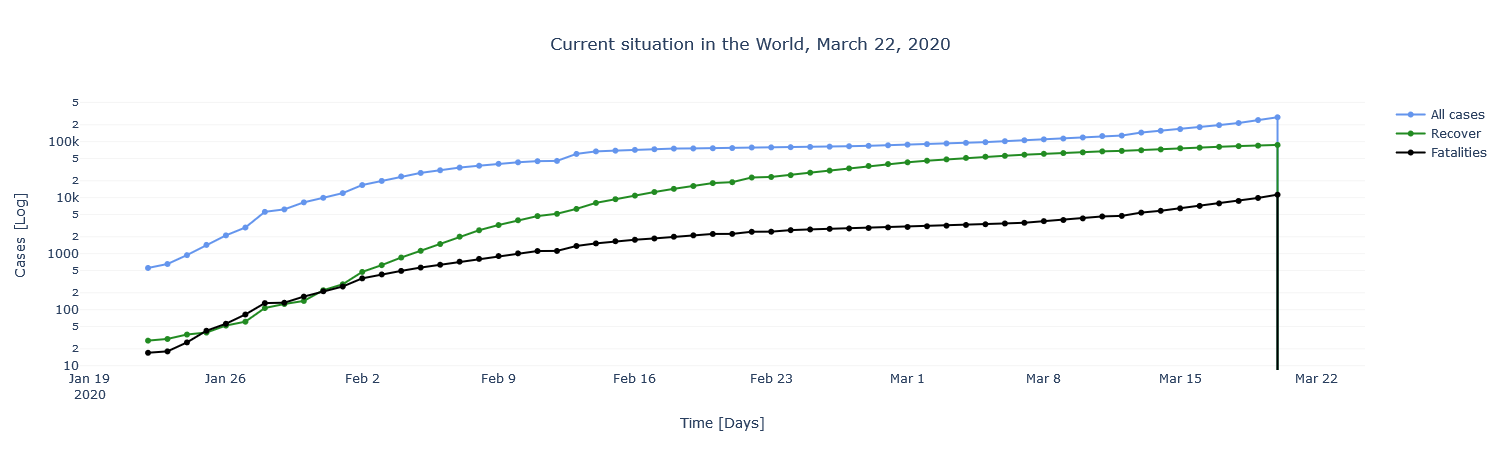

In [21]:
dplot.disp_cum_jhu(all_cases, all_recov, all_death, 'the World')

## Quick country check

Check the current status of diagnosed cases 

In [58]:
# For Europe, interesting data start from Feb 20, 2020
start_date = '2020-2-20'
mask = all_cases.index > start_date

In [108]:
df_c['Country/Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [118]:
# Extract all info for mainland France (exclude all other islands)
#country_name = 'France'
#country_name = 'Italy'
#country_name = 'United Kingdom'
#country_name = 'US' # mainland=False
#country_name = 'Korea, South'
country_name = 'China'   # SOLVE FOR CHINA & US, GETTIMESERIES ISNT WORKING FOR THEM

# Get a timeseries with country data (last argument "mainland" is True by default)
ctry_cases = df.get_timeseries_from_JHU(df_c, country_name)
ctry_death = df.get_timeseries_from_JHU(df_d, country_name)
ctry_recov = df.get_timeseries_from_JHU(df_r, country_name)

data_jhu = pd.DataFrame(index=ctry_cases.index)
data_jhu['cases'] = ctry_cases.values
data_jhu['death'] = ctry_death.values
data_jhu['recov'] = ctry_recov.values

IndexError: single positional indexer is out-of-bounds

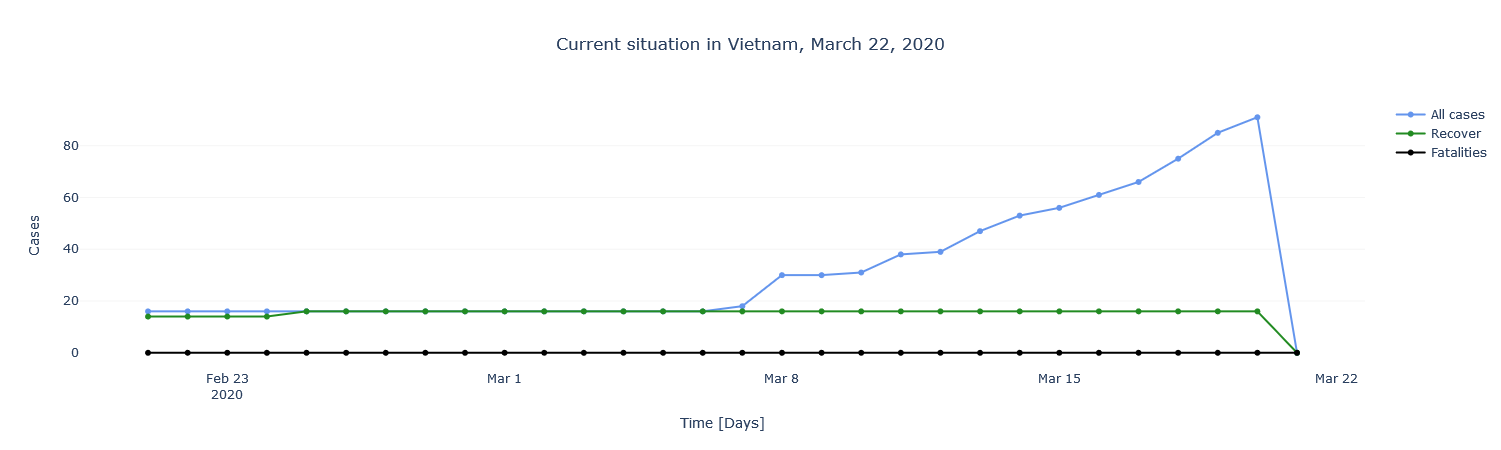

In [116]:
# Cumulative cases in the country
dplot.disp_cum_jhu(ctry_cases, ctry_recov, ctry_death, country_name, mask)

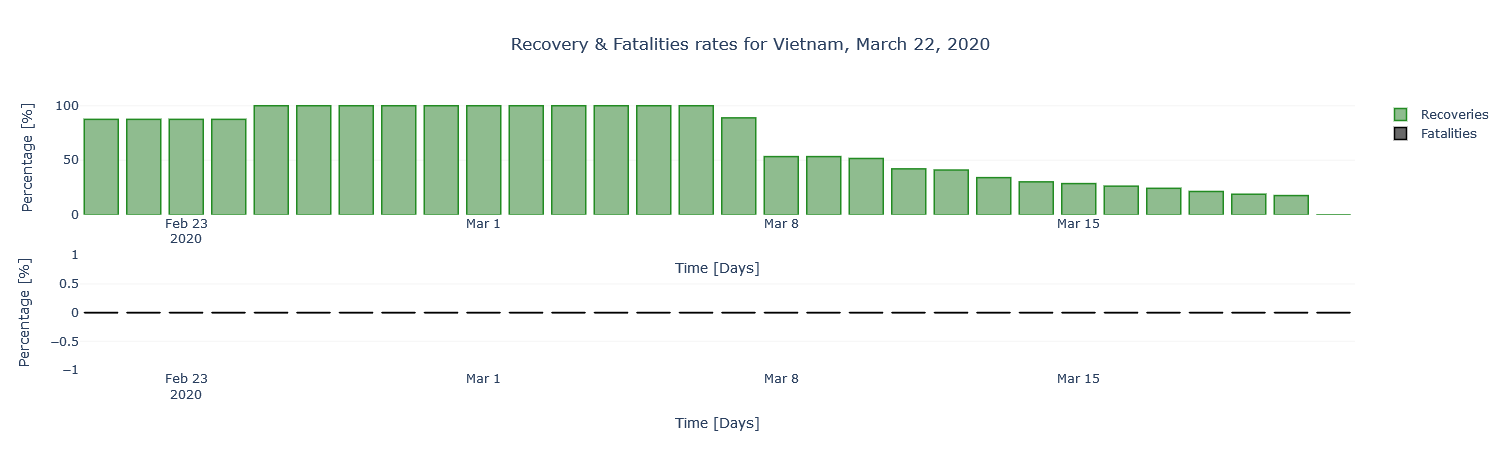

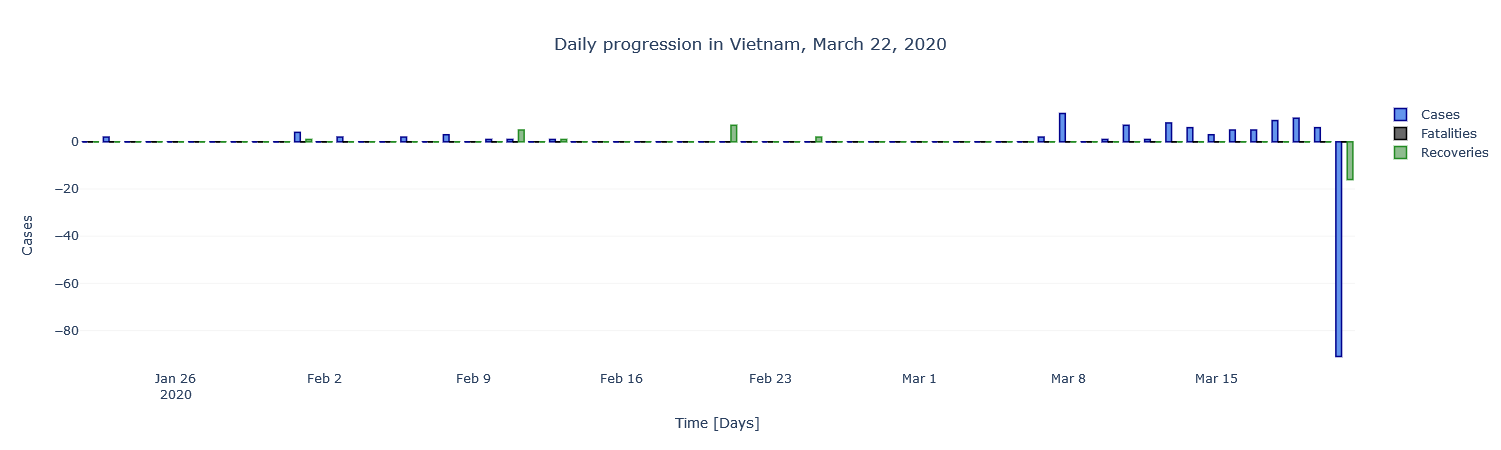

In [117]:
# Daily cases in the country
dplot.disp_country_rates_jhu(ctry_cases, ctry_recov, ctry_death, country_name, mask)
dplot.disp_daily_cases(data_jhu, country_name)

## Compare the evolution of the disease in France vs Another Country

Check the evolution of coronavirus in both countries

In [56]:
# get data from France
c1_name = 'France'
c1_cases = df.get_timeseries_from_JHU(df_c, c1_name)

# get data from the other country
c2_name = 'Italy'
c2_cases = df.get_timeseries_from_JHU(df_c, c2_name)

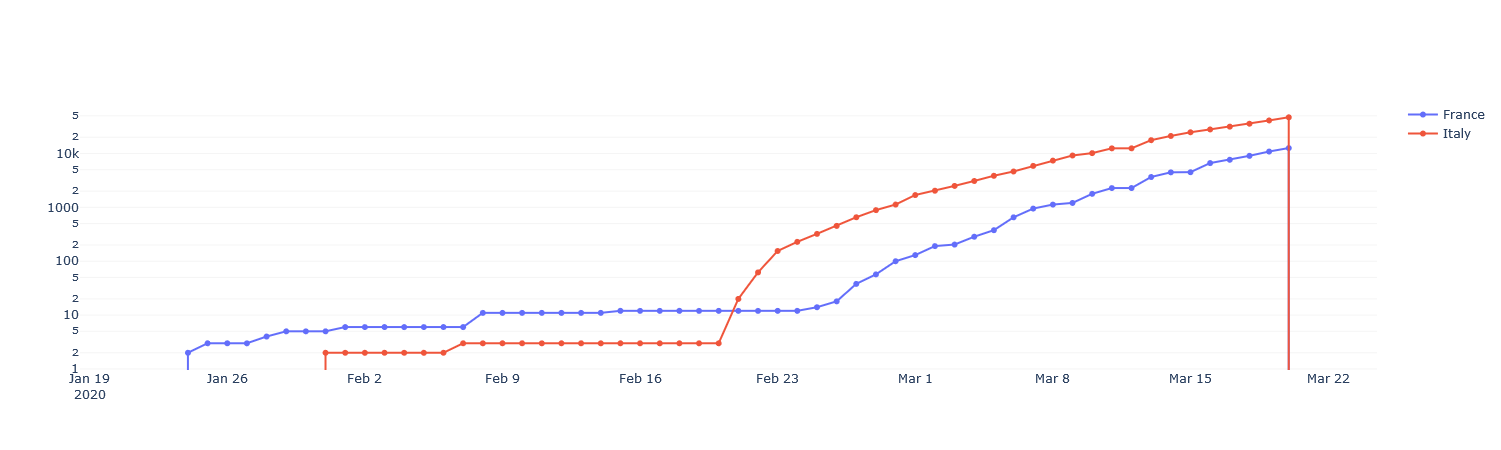

In [57]:
# Compare confirmed cases in France and Italy
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        mode='lines+markers',
        name = c1_name,
        x = c1_cases.index,
        y = c1_cases.values
    ))
fig.add_trace(
    go.Scatter(
        mode='lines+markers',
        name = c2_name,
        x = c2_cases.index,
        y = c2_cases.values
    ))

# change y axis grid options
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')
                     
# change background color, yaxis type and horizontal bar selector
fig.update_layout(plot_bgcolor='white', yaxis_type="log", xaxis_rangeslider_visible=False)

fig.show()

## Study the disease in Europe and compare some countries

Its said in the media that the Covid-19 will reach a higher impact in europeans contries compare to China, and asian countries since the deployment of solutions are not that strict

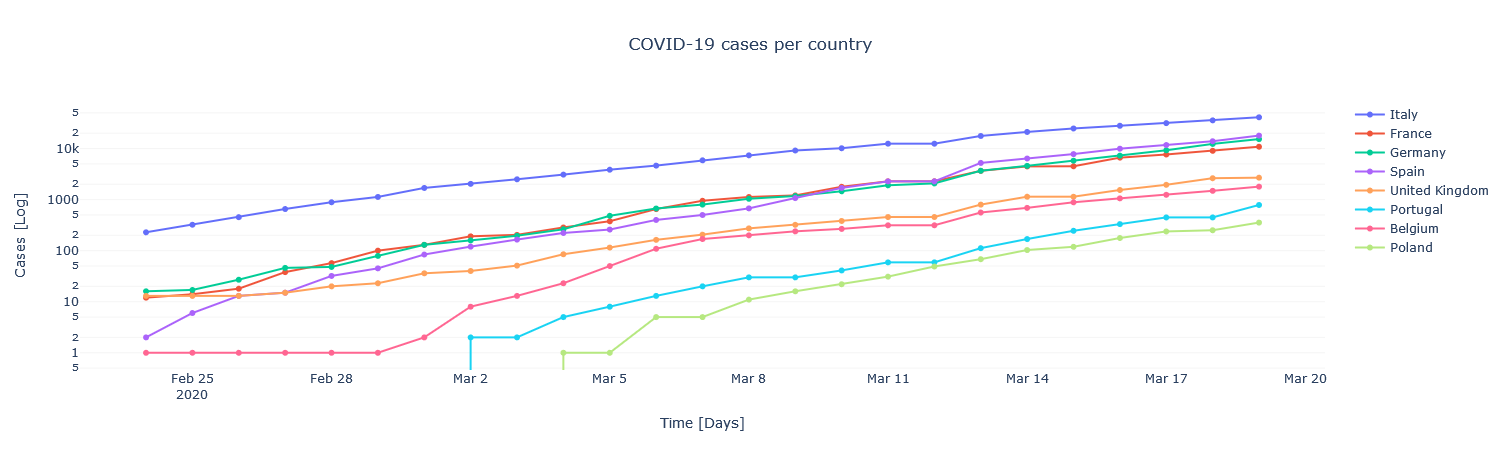

In [19]:
# List with countries to compare
list_c = ['Italy', 'France', 'Germany', 'Spain', 'United Kingdom', 'Portugal', 'Belgium', 'Poland']

fig = go.Figure()

for c in list_c:
    if c == 'France':
        data_c = np.array(df_c['France - France'], dtype=int)
    elif c == 'United Kingdom':
        data_c = np.array(df_c['United Kingdom - United Kingdom'], dtype=int)
    else:
        data_c = np.array(df_c[c], dtype=int)

    fig.add_trace(
        go.Scatter(
            mode = 'lines+markers',
            x = df_c.Date[mask],
            y = data_c[mask], 
            name = c
        ))
    
# change background color, yaxis type and horizontal bar selector
fig.update_layout(
    xaxis_title = 'Time [Days]',
    yaxis_title = 'Cases [Log]',
    title = 'COVID-19 cases per country',
    title_x = 0.5,
    plot_bgcolor='white', yaxis_type="log"
)

# change y axis grid options
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

Data compare to the number of inhabitants per country. Population data available at https://data.worldbank.org/

In [69]:
# get total population from online repository (Out-dated)
# glob_pop_url = 'https://query.data.world/s/4ntitiskmvbauwvd4hb5teu4sjgw4a'
# df_gp = pd.read_csv(glob_pop_url, skiprows=4)

# TO FIX
# get total population from local repository (originally from data.worldbank.org, last visited 16 March 2020)
df_gp_raw = pd.read_csv('local_data/world_population/API_SP.POP.TOTL_DS2_en_csv_v2_866861.csv', skiprows=4)

FileNotFoundError: [Errno 2] File local_data/world_population/API_SP.POP.TOTL_DS2_en_csv_v2_866861.csv does not exist: 'local_data/world_population/API_SP.POP.TOTL_DS2_en_csv_v2_866861.csv'

In [ ]:
# Mark year for analysis
year_analysis = pd.datetime(2018,1,1)

# Prepare dataframe
col_names = df_gp_raw.columns
date_data = pd.to_datetime(df_gp_raw.columns[4:-2])
df_gp_raw['Country Name']
# Get columns header from country columns
col_headers = pd.Series(data=df_gp_raw['Country Name'], dtype='str')

# Build new dataframe exclude 2019 and any other column with text
df_gp = pd.DataFrame(data=date_data, columns=['Date'])
for cidx, c in enumerate(col_headers):
    data_tmp = np.array(df_gp_raw.iloc[cidx][4:-2], dtype='float')
    df_gp[c] = data_tmp

In [18]:
# Display population grow for countries previously check
fig = go.Figure()

for c in list_c: 
    data_plot = np.array(df_gp[c])
    fig.add_trace(go.Scatter(
        mode = 'lines+markers',
        x = df_gp.Date,
        y = data_plot,
        name = c
    ))
    
# change background color, yaxis type and horizontal bar selector
fig.update_layout(
    xaxis_title = 'Time [Years]',
    yaxis_title = 'Country Population [Hab]',
    title = 'Population evolution per country',
    title_x = 0.5,
    plot_bgcolor='white'
)

# change y axis grid options
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

NameError: name 'df_gp' is not defined

In [19]:
# Calculate the impact of covid-19 over the total population per country
fig = go.Figure()

for c in list_c:
    # check country population for year_analysis
    pop_year = np.array(df_gp[c][df_gp.Date == year_analysis], dtype=int)
    if c == 'France':
        data_c = np.array(df_c['France - France'], dtype=int)
    elif c == 'United Kingdom':
        data_c = np.array(df_c['United Kingdom - United Kingdom'], dtype=int)
    else:
        data_c = np.array(df_c[c], dtype=int)

    fig.add_trace(
        go.Scatter(
            mode = 'lines+markers',
            x = df_c.Date[mask],
            y = data_c[mask] / pop_year * 100, 
            name = c
        ))
    
# change background color, yaxis type and horizontal bar selector
fig.update_layout(
    xaxis_title = 'Time [Days]',
    yaxis_title = 'Population impact [%]',
    title = 'COVID-19 impact in country population',
    title_x = 0.5,
    plot_bgcolor='white'
)

# change y axis grid options
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

NameError: name 'df_gp' is not defined